## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Загружаем исходные данные

In [2]:
train = np.loadtxt('./data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./data/digit/test.csv', delimiter=',', skiprows=1)

In [151]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обработки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [4]:
train_img.shape

(42000, 28, 28)

## Визуализируем исходные данные

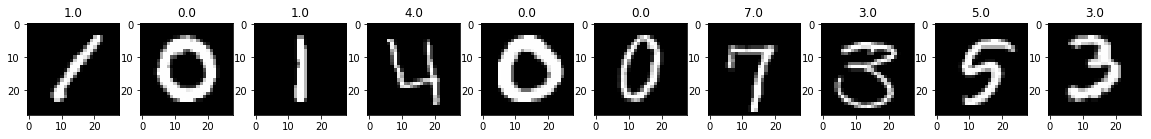

In [229]:
fig = plt.figure(figsize=(20, 20))
for i, img in enumerate(train_img[0:10], 1):
    kernel = np.ones((5,5), np.uint8)
    subplot = fig.add_subplot(10, 10, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);


## Делим изображение на части

In [230]:
def get_images_4(imgs):
    train_img_4 = []
    for i, img in enumerate(imgs):
        train_img_4.append(np.append(img[ :14, 14:], img[ 14:, :14], axis=1))
    return train_img_4
    

In [231]:
train_img_4 = get_images_4(train_img)
test_img_4 = get_images_4(test_img)

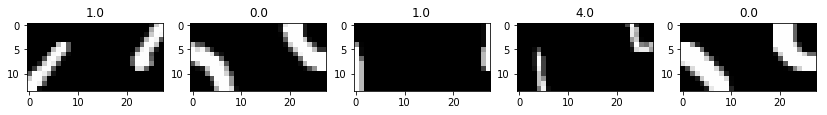

In [232]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img_4[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

## Строим гистограммы по частям изображений

In [233]:
train_sobel_x_4 = np.zeros_like(train_img_4)
train_sobel_y_4 = np.zeros_like(train_img_4)

for i in range(len(train_img_4)):
    train_sobel_x_4[i] = cv2.Sobel(train_img_4[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    train_sobel_y_4[i] = cv2.Sobel(train_img_4[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

test_sobel_x_4 = np.zeros_like(test_img_4)
test_sobel_y_4 = np.zeros_like(test_img_4)

for i in range(len(test_img_4)):
    test_sobel_x_4[i] = cv2.Sobel(test_img_4[i], cv2.CV_64F, dx=1, dy=0, ksize=3)
    test_sobel_y_4[i] = cv2.Sobel(test_img_4[i], cv2.CV_64F, dx=0, dy=1, ksize=3)

train_g_q, train_theta_q = cv2.cartToPolar(train_sobel_x_4, train_sobel_y_4)
test_g_q, test_theta_q = cv2.cartToPolar(test_sobel_x_4, test_sobel_y_4)

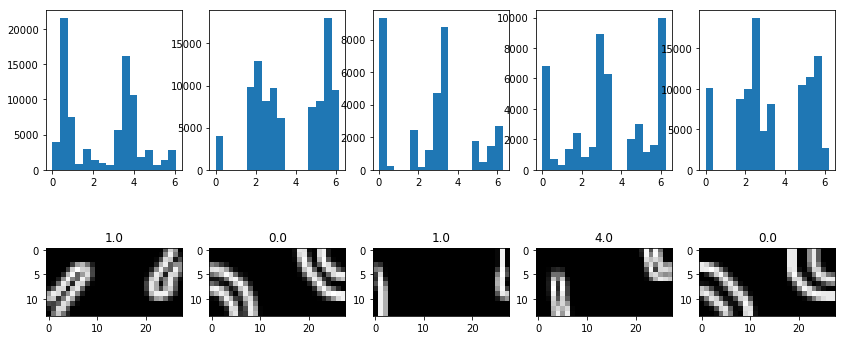

In [234]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_g_q[:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);
    subplot = fig.add_subplot(3, 7, i)
    plt.hist(train_theta_q[i - 1].flatten(),
             bins=16, weights=train_g_q[i - 1].flatten())

In [235]:
train_hist_q = np.zeros((len(train_img_4), 16))
for i in range(len(train_img_4)):
    hist, borders = np.histogram(train_theta_q[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_g_q[i])
    train_hist_q[i] = hist
    
test_hist_q = np.zeros((len(test_img_4), 16))
for i in range(len(test_img_4)):
    hist, borders = np.histogram(test_theta_q[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_g_q[i])
    test_hist_q[i] = hist
    


train_hist_q = train_hist_q / np.linalg.norm(train_hist_q, axis=1)[:, None]
test_hist_q = test_hist_q / np.linalg.norm(test_hist_q, axis=1)[:, None]

## Строим гистограммы по частям картинки после применения морфологического градиента

In [236]:
train_sobel_x = np.zeros_like(train_img_4)
train_sobel_y = np.zeros_like(train_img_4)
for i in range(len(train_img_4)):
    train_sobel_x[i] = cv2.Sobel(cv2.morphologyEx(train_img_4[i], cv2.MORPH_GRADIENT, kernel), cv2.CV_64F, dx=1, dy=0, ksize=3)
    train_sobel_y[i] = cv2.Sobel(cv2.morphologyEx(train_img_4[i],cv2.MORPH_GRADIENT, kernel), cv2.CV_64F, dx=0, dy=1, ksize=3)

In [237]:
test_sobel_x = np.zeros_like(test_img_4)
test_sobel_y = np.zeros_like(test_img_4)
for i in range(len(test_img_quarter)):
    test_sobel_x[i] = cv2.Sobel(cv2.morphologyEx(test_img_4[i], cv2.MORPH_GRADIENT, kernel), cv2.CV_64F, dx=1, dy=0, ksize=3)
    test_sobel_y[i] = cv2.Sobel(cv2.morphologyEx(test_img_4[i], cv2.MORPH_GRADIENT, kernel), cv2.CV_64F, dx=0, dy=1, ksize=3)

In [238]:
train_g, train_theta = cv2.cartToPolar(train_sobel_x, train_sobel_y)

In [239]:
test_g, test_theta = cv2.cartToPolar(test_sobel_x, test_sobel_y)

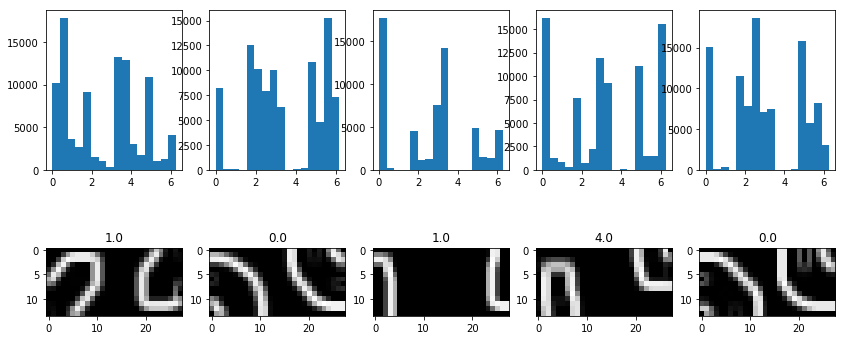

In [240]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_g[:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);
    subplot = fig.add_subplot(3, 7, i)
    plt.hist(train_theta[i - 1].flatten(),
             bins=16, weights=train_g[i - 1].flatten())

In [241]:
# Гистограммы вычисляются с учетом длины вектора градиента
train_hist = np.zeros((len(train_img_4), 16))
for i in range(len(train_img_4)):
    hist, borders = np.histogram(train_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_g[i])
    train_hist[i] = hist

In [242]:
test_hist = np.zeros((len(test_img_4), 16))
for i in range(len(test_img_4)):
    hist, borders = np.histogram(test_theta[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_g[i])
    test_hist[i] = hist

In [243]:
# По умолчанию используется L2 норма
train_hist = train_hist / np.linalg.norm(train_hist, axis=1)[:, None]

In [244]:
test_hist = test_hist / np.linalg.norm(test_hist, axis=1)[:, None]

## Вычисляем гистограммы частей картинок после применения Dilate морфирования

In [245]:
train_sobel_x_i = np.zeros_like(train_img)
train_sobel_y_i = np.zeros_like(train_img)
for i in range(len(train_img)):
    train_sobel_x_i[i] = cv2.Sobel(cv2.dilate(train_img[i],kernel,1), cv2.CV_64F, dx=1, dy=0, ksize=3)
    train_sobel_y_i[i] = cv2.Sobel(cv2.dilate(train_img[i],kernel,1), cv2.CV_64F, dx=0, dy=1, ksize=3)

test_sobel_x_i = np.zeros_like(test_img)
test_sobel_y_i = np.zeros_like(test_img)
for i in range(len(test_img)):
    test_sobel_x_i[i] = cv2.Sobel(cv2.dilate(test_img[i],kernel,1), cv2.CV_64F, dx=1, dy=0, ksize=3)
    test_sobel_y_i[i] = cv2.Sobel(cv2.dilate(test_img[i],kernel,1), cv2.CV_64F, dx=0, dy=1, ksize=3)
    

train_g_i, train_theta_i = cv2.cartToPolar(train_sobel_x_i, train_sobel_y_i)
test_g_i, test_theta_i = cv2.cartToPolar(test_sobel_x_i, test_sobel_y_i)


train_hist_i = np.zeros((len(train_img), 16))
for i in range(len(train_img)):
    hist, borders = np.histogram(train_theta_i[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=train_g_i[i])
    train_hist_i[i] = hist
    
test_hist_i = np.zeros((len(test_img), 16))
for i in range(len(test_img)):
    hist, borders = np.histogram(test_theta_i[i],
                                 bins=16,
                                 range=(0., 2. * np.pi),
                                 weights=test_g_i[i])
    test_hist_i[i] = hist

train_hist_i = train_hist_i / np.linalg.norm(train_hist_i, axis=1)[:, None]
test_hist_i = test_hist_i / np.linalg.norm(test_hist_i, axis=1)[:, None]

## Конкатенируем все признаки:

In [246]:
train_hist_all=np.concatenate((train_hist,train_hist_q, train_hist_i), axis=1)
test_hist_all=np.concatenate((test_hist, test_hist_q, test_hist_i), axis=1)

## Разбиваем выборку на обучение и валидацию

In [247]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val= train_test_split(train_hist_all, train_label, test_size=0.2, random_state=42)

In [248]:
from sklearn.neighbors import KNeighborsClassifier

In [249]:
clf = KNeighborsClassifier().fit(X_train,y_train)

In [250]:
knn_pred=clf.predict(X_val)

In [251]:
clf.score(X_val,y_val)

0.9144047619047619

In [252]:
accuracy_score(y_val, knn_pred)

0.9144047619047619

In [261]:
print(classification_report(y_val, knn_pred))

             precision    recall  f1-score   support

        0.0       0.88      0.98      0.93       816
        1.0       0.95      0.99      0.97       909
        2.0       0.92      0.91      0.92       846
        3.0       0.84      0.90      0.87       937
        4.0       0.95      0.90      0.92       839
        5.0       0.93      0.91      0.92       702
        6.0       0.96      0.94      0.95       785
        7.0       0.94      0.90      0.92       893
        8.0       0.87      0.83      0.85       835
        9.0       0.91      0.89      0.90       838

avg / total       0.92      0.91      0.91      8400



In [262]:
print(confusion_matrix(y_val, knn_pred))

[[800   4   2   2   1   0   4   2   1   0]
 [  0 897   0   1   2   0   3   1   4   1]
 [ 15   3 774  20   5   2   2   3  19   3]
 [  6   1  13 843   1  33   0   1  31   8]
 [ 11  17  11   0 752   0   4   9  13  22]
 [  2   0   0  48   1 637   6   1   5   2]
 [ 28   3   6   1   2   5 737   0   3   0]
 [  4   5  19  15   6   1   0 800  19  24]
 [ 27   9  15  46   9   5   9   8 697  10]
 [ 14   3   4  24  10   1   0  29   9 744]]


In [263]:
knn_pred_test=clf.predict(test_hist_all)

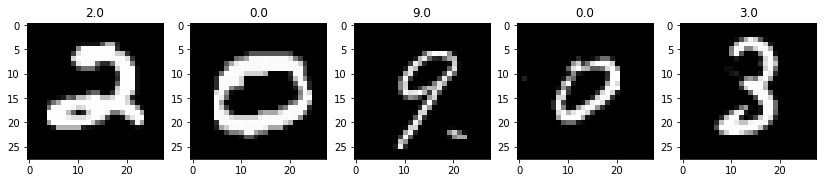

In [268]:
fig=plt.figure(figsize=(20,10))
for i, img in enumerate(test_img[0:5],1):
    subplot=fig.add_subplot(1,7,i)
    plt.imshow(img, cmap='gray')
    subplot.set_title(knn_pred_test[i - 1])

## Формируем файл для отправки:

In [269]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(knn_pred_test, 1):
        dst.write('%s,%s\n' % (i, int(p)))

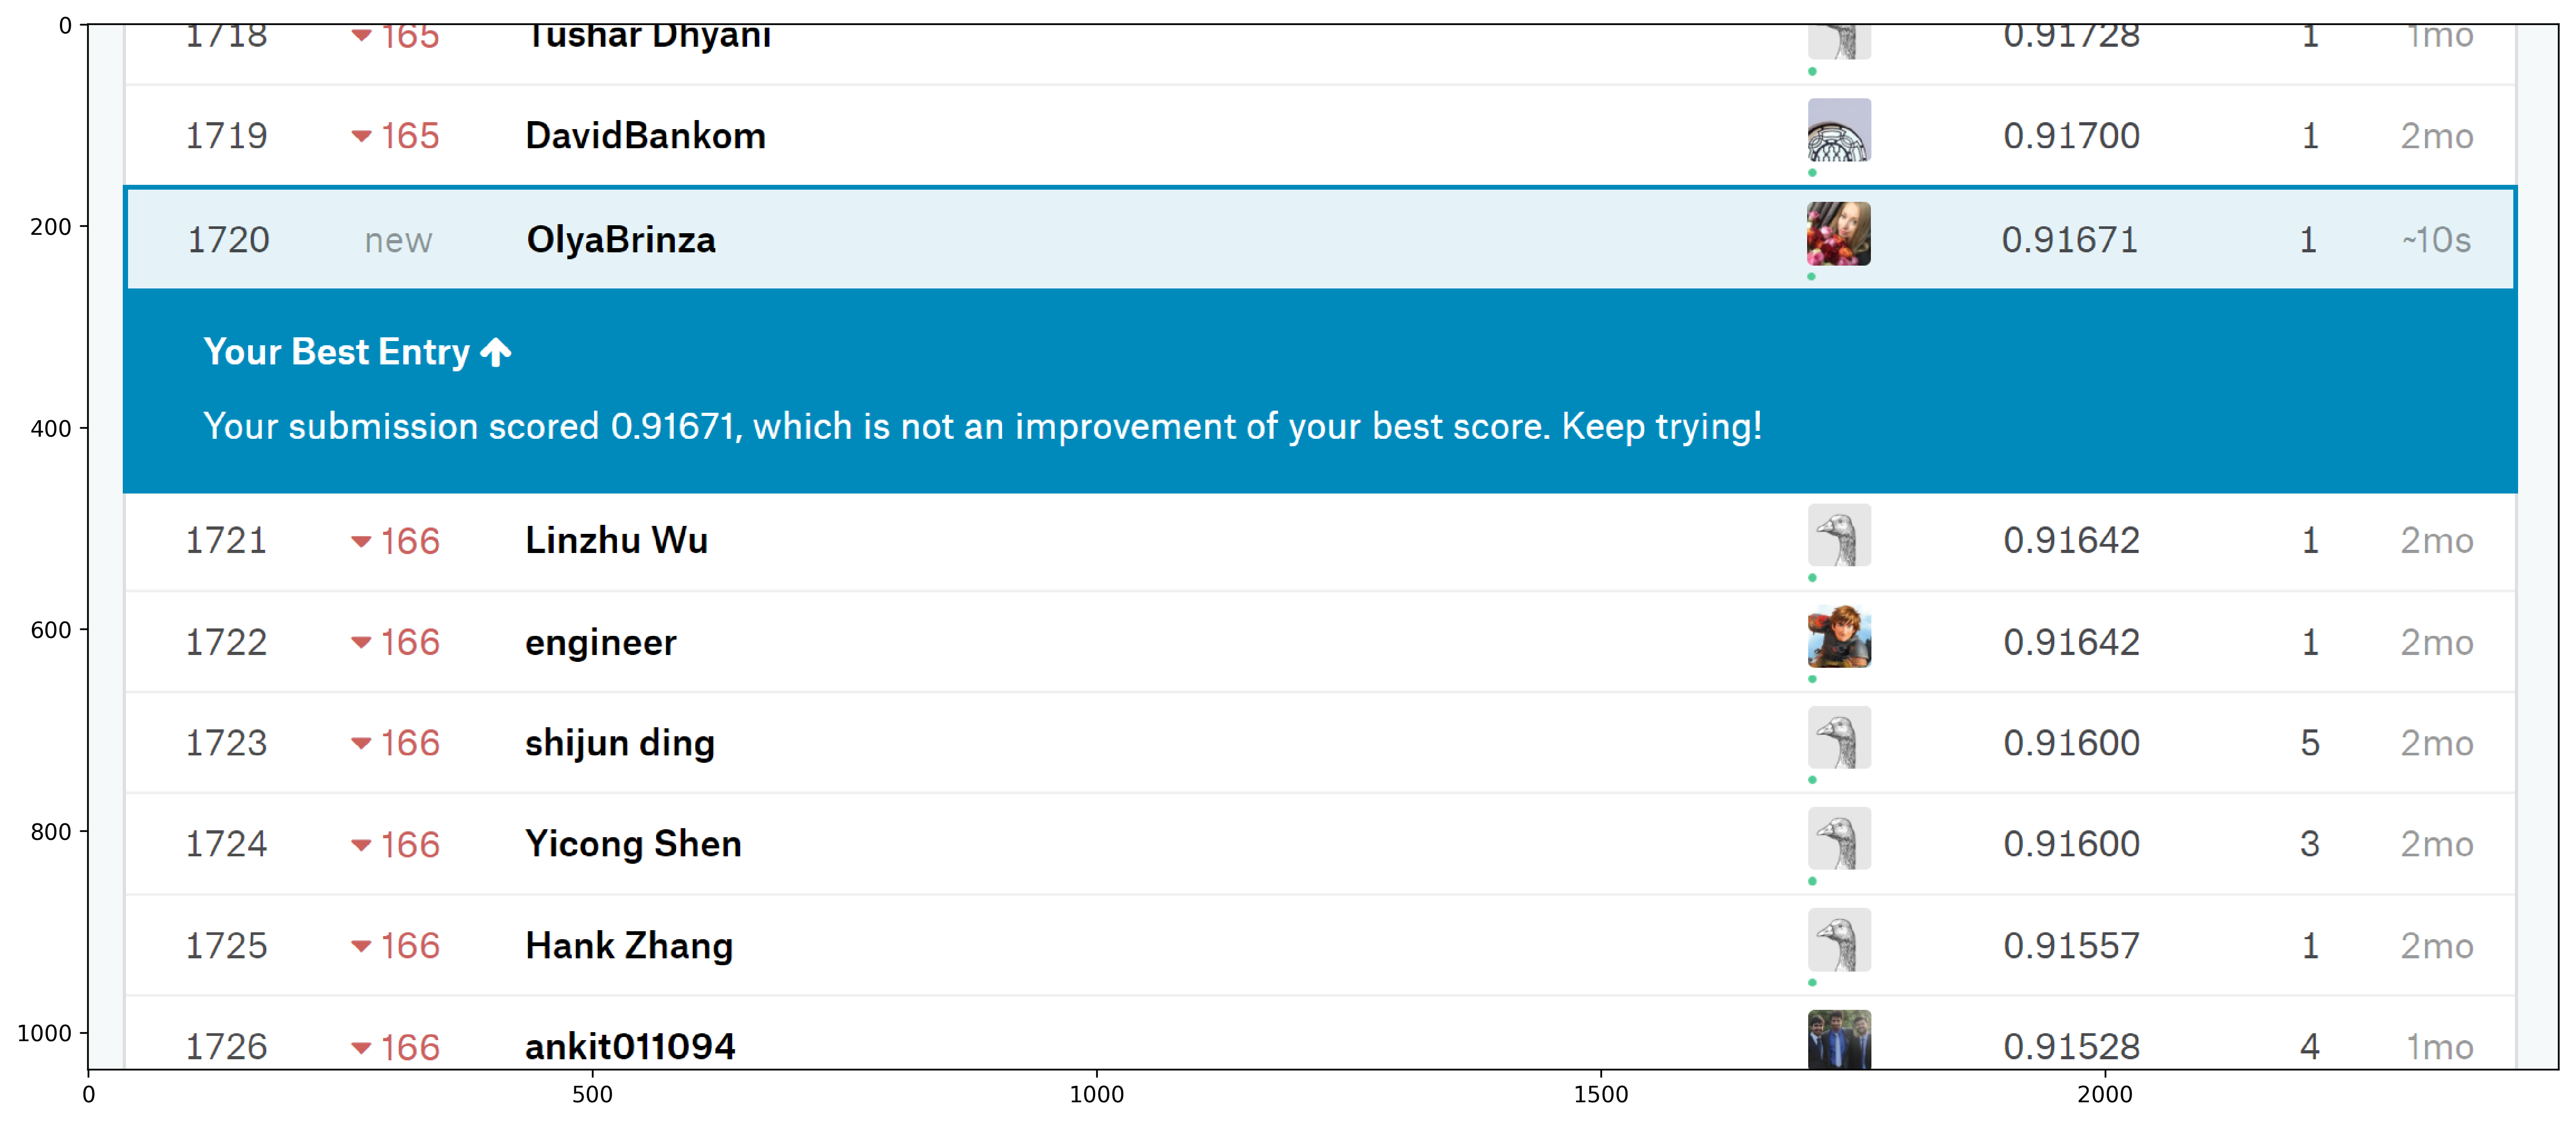

In [275]:
import matplotlib.image as mpimg
img=mpimg.imread('submission_score_knn.png')
plt.figure(num=None, figsize=(20, 10), dpi=300, facecolor='w', edgecolor='k')
imgplot = plt.imshow(img)
plt.show()

## Попробуем улучшить результат, используя другой алгоритм

In [276]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [277]:
rf = RandomForestClassifier()

In [278]:
max_depth = (20, 25, 27, 30)
n_estimators = (19, 20, 22, 25, 30)

In [279]:
params_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth
}

In [280]:
grid = {'max_depth': max_depth, 'n_estimators': n_estimators}
gridsearch = GridSearchCV(rf, params_grid, scoring='accuracy', cv=5, verbose = 5)
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] max_depth=20, n_estimators=19 ...................................
[CV] .... max_depth=20, n_estimators=19, score=0.889798, total=   5.3s
[CV] max_depth=20, n_estimators=19 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s


[CV] .... max_depth=20, n_estimators=19, score=0.882475, total=   4.9s
[CV] max_depth=20, n_estimators=19 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.8s remaining:    0.0s


[CV] .... max_depth=20, n_estimators=19, score=0.886178, total=   5.2s
[CV] max_depth=20, n_estimators=19 ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.3s remaining:    0.0s


[CV] .... max_depth=20, n_estimators=19, score=0.887748, total=   5.0s
[CV] max_depth=20, n_estimators=19 ...................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   21.6s remaining:    0.0s


[CV] .... max_depth=20, n_estimators=19, score=0.883264, total=   5.4s
[CV] max_depth=20, n_estimators=20 ...................................
[CV] .... max_depth=20, n_estimators=20, score=0.890988, total=   8.7s
[CV] max_depth=20, n_estimators=20 ...................................
[CV] .... max_depth=20, n_estimators=20, score=0.886492, total=   9.0s
[CV] max_depth=20, n_estimators=20 ...................................
[CV] .... max_depth=20, n_estimators=20, score=0.884392, total=   9.5s
[CV] max_depth=20, n_estimators=20 ...................................
[CV] .... max_depth=20, n_estimators=20, score=0.886854, total=  14.7s
[CV] max_depth=20, n_estimators=20 ...................................
[CV] .... max_depth=20, n_estimators=20, score=0.888624, total=   7.5s
[CV] max_depth=20, n_estimators=22 ...................................
[CV] .... max_depth=20, n_estimators=22, score=0.888162, total=   9.5s
[CV] max_depth=20, n_estimators=22 ...................................
[CV] .

[CV] .... max_depth=27, n_estimators=22, score=0.892873, total=  25.0s
[CV] max_depth=27, n_estimators=22 ...................................
[CV] .... max_depth=27, n_estimators=22, score=0.893107, total=  25.0s
[CV] max_depth=27, n_estimators=22 ...................................
[CV] .... max_depth=27, n_estimators=22, score=0.888624, total=  17.8s
[CV] max_depth=27, n_estimators=25 ...................................
[CV] .... max_depth=27, n_estimators=25, score=0.895152, total=  12.5s
[CV] max_depth=27, n_estimators=25 ...................................
[CV] .... max_depth=27, n_estimators=25, score=0.890360, total=  12.2s
[CV] max_depth=27, n_estimators=25 ...................................
[CV] .... max_depth=27, n_estimators=25, score=0.885880, total=  14.2s
[CV] max_depth=27, n_estimators=25 ...................................
[CV] .... max_depth=27, n_estimators=25, score=0.896531, total=  30.4s
[CV] max_depth=27, n_estimators=25 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 40.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': (19, 20, 22, 25, 30), 'max_depth': (20, 25, 27, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=5)

In [281]:
gridsearch.best_params_

{'max_depth': 30, 'n_estimators': 30}

In [282]:
rfc = RandomForestClassifier(max_depth = 30, n_estimators = 30)

In [283]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [284]:
rfc_pred = rfc.predict(X_val)

In [285]:
accuracy_score(y_val, rfc_pred)

0.9028571428571428

In [286]:
print(classification_report(y_val, rfc_pred))

             precision    recall  f1-score   support

        0.0       0.90      0.96      0.93       816
        1.0       0.98      0.96      0.97       909
        2.0       0.87      0.92      0.90       846
        3.0       0.85      0.84      0.85       937
        4.0       0.94      0.90      0.92       839
        5.0       0.91      0.90      0.90       702
        6.0       0.94      0.93      0.94       785
        7.0       0.92      0.90      0.91       893
        8.0       0.82      0.84      0.83       835
        9.0       0.91      0.88      0.89       838

avg / total       0.90      0.90      0.90      8400



In [287]:
print(confusion_matrix(y_val, rfc_pred))

[[784   5   2   2   2   0  13   2   6   0]
 [  1 877   2   5  13   0   1   4   5   1]
 [  8   2 778  17   3   2   4   3  24   5]
 [  4   0  28 791   2  42   3   3  50  14]
 [ 11   2  17   2 756   0   6  10   9  26]
 [  3   0   4  43   1 630  10   1   9   1]
 [ 25   3   8   1   6   4 733   0   5   0]
 [  4   4  17  18   4   0   1 802  23  20]
 [ 19   2  30  31  12  12  11  13 699   6]
 [ 11   1   6  23   9   4   0  32  18 734]]


In [288]:
rfc_pred_test=clf.predict(test_hist_all)

In [289]:
with open('submit2.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(rfc_pred_test, 1):
        dst.write('%s,%s\n' % (i, int(p)))

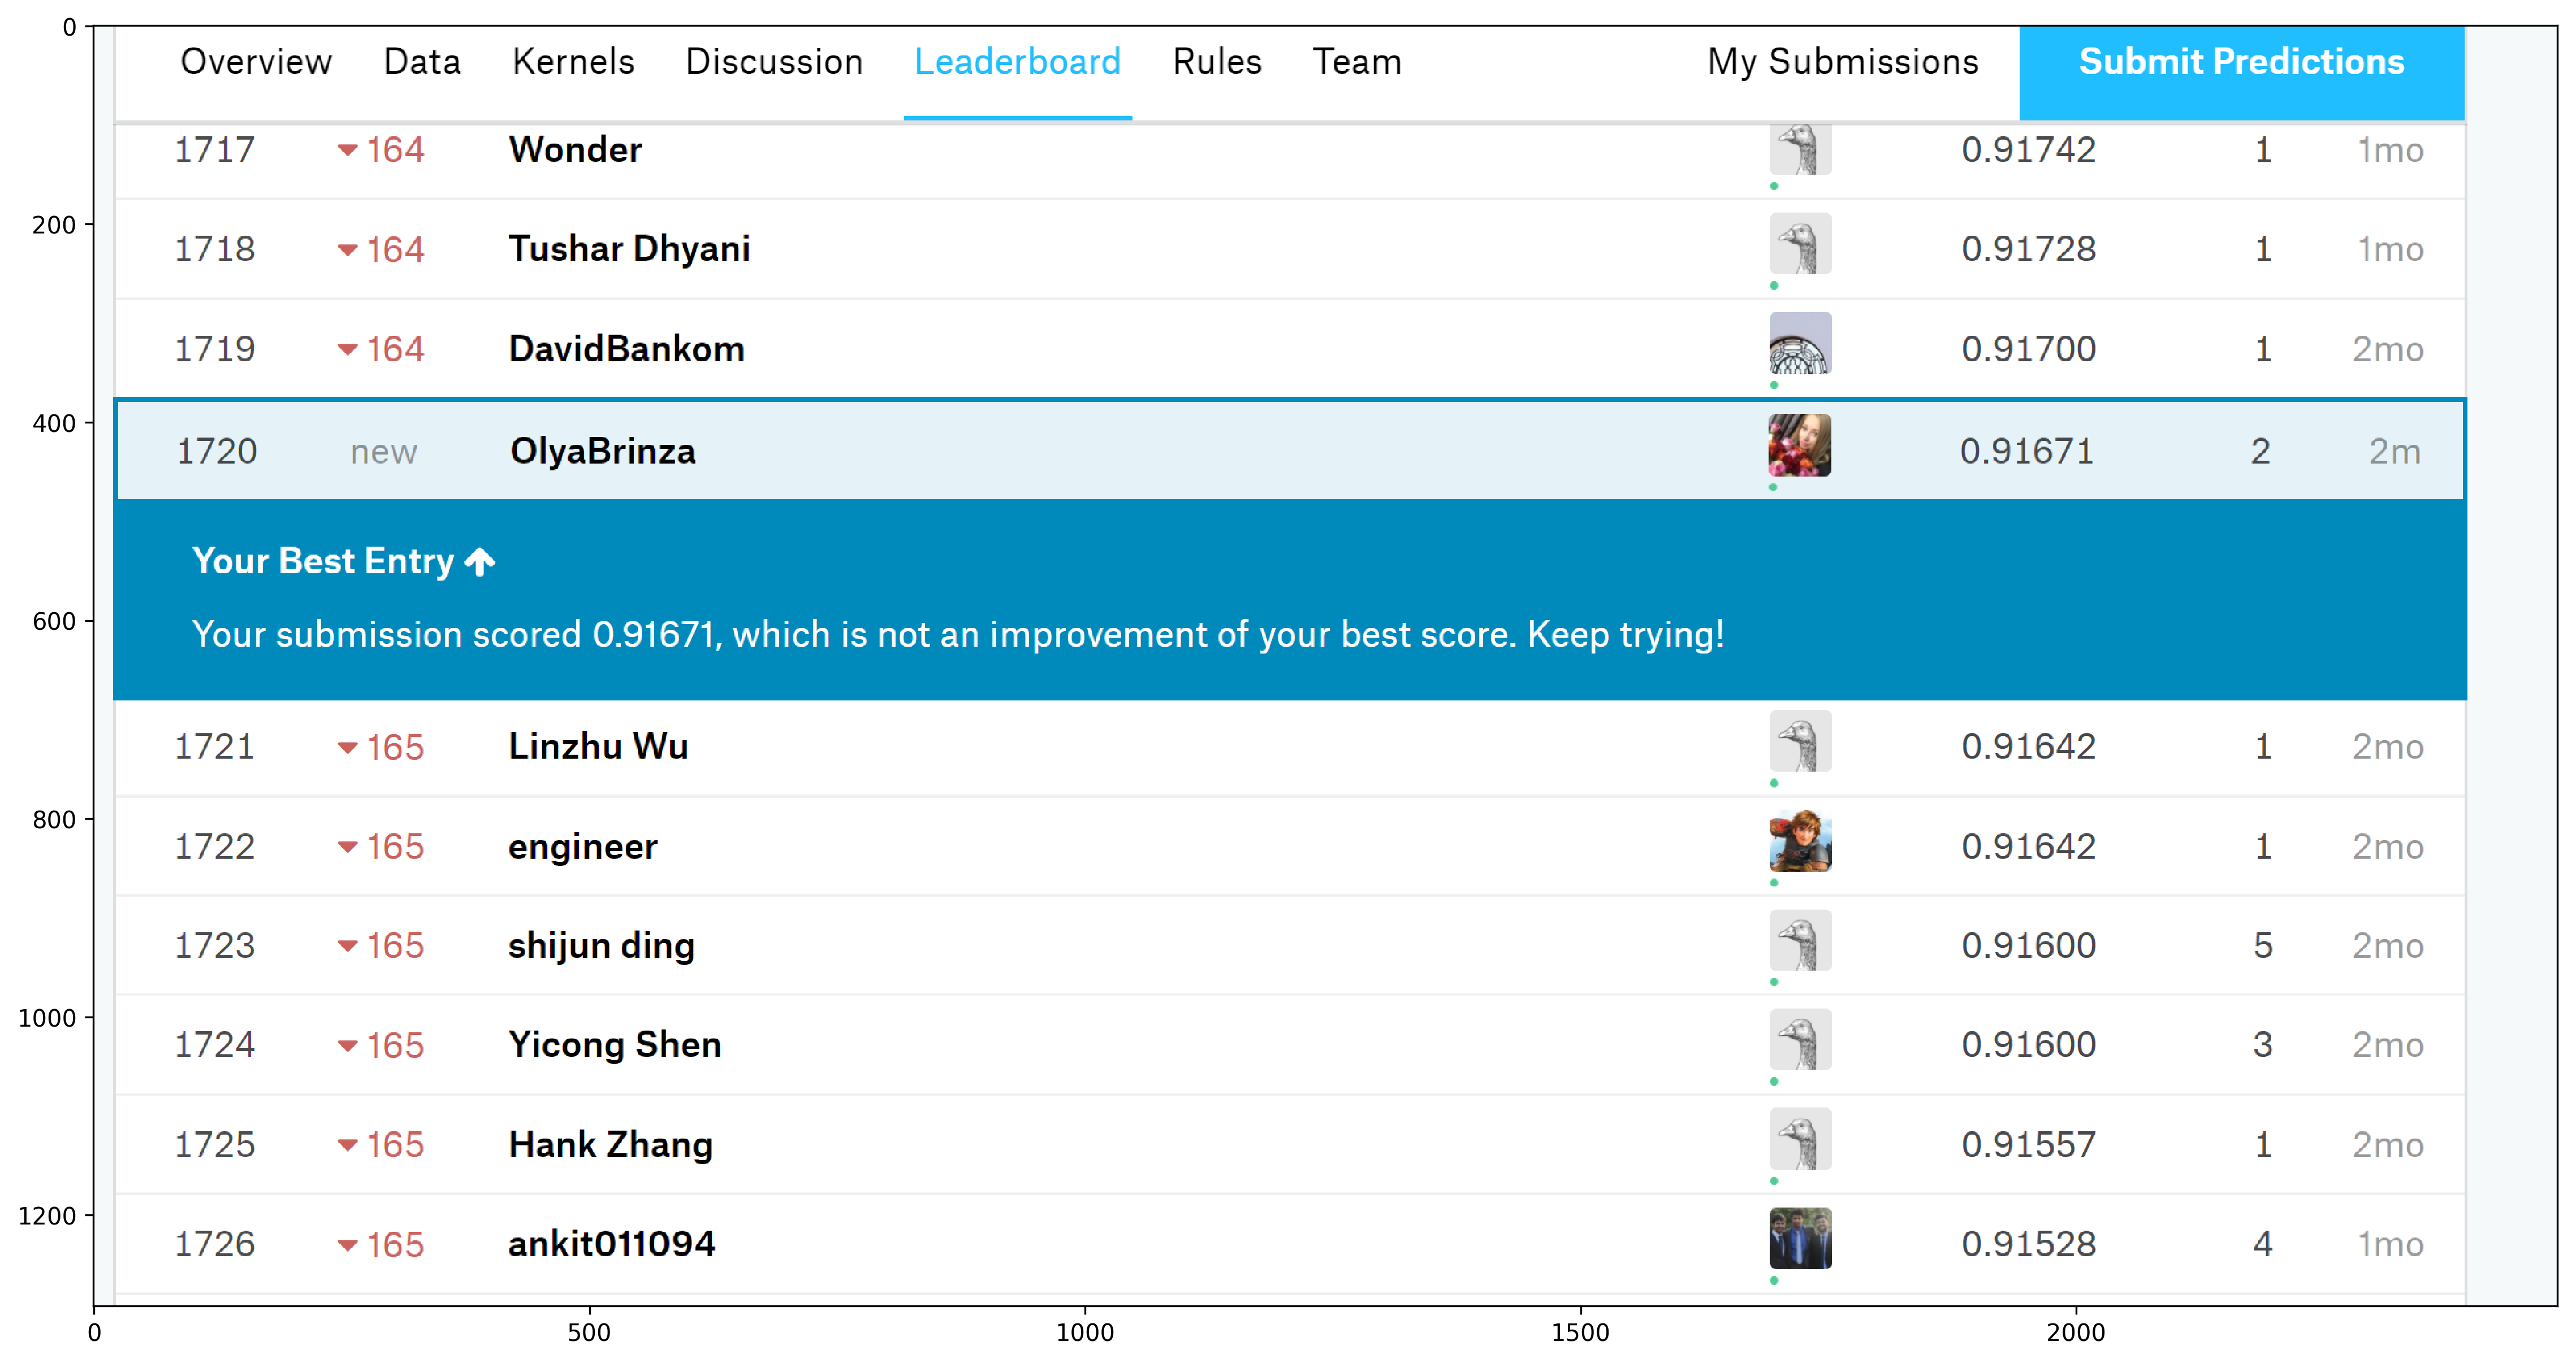

In [290]:
import matplotlib.image as mpimg
img=mpimg.imread('submission_score_rfc.png')
plt.figure(num=None, figsize=(20, 10), dpi=300, facecolor='w', edgecolor='k')
imgplot = plt.imshow(img)
plt.show()

## Алгоритм дал такой же показатель метрики Accuracy на тестовых данных, как и knn